In [ ]:
import os
import gdown
dataset_url = "https://drive.google.com/file/d/1KaPgmCOze7F-9yT_-Yq2mtPyhBXDbVzq/view?usp=sharing"
zip_download_dir = "artifacts/data_ingestion/data.zip"
unzip_path = "artifacts/data_ingestion/unzipped_data"

os.makedirs(os.path.dirname(zip_download_dir), exist_ok=True)
print(f"Downloading data from {dataset_url} into file {zip_download_dir}")

file_id = dataset_url.split("/")[-2]
prefix = "https://drive.google.com/uc?/export=download&id="
gdown.download(prefix + file_id, zip_download_dir, quiet=False)

print(f"Data downloaded at {zip_download_dir}")


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1KaPgmCOze7F-9yT_-Yq2mtPyhBXDbVzq
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1KaPgmCOze7F-9yT_-Yq2mtPyhBXDbVzq&confirm=t&uuid=997284a0-415b-4b3d-a9d9-a345737c89c6
To: /content/artifacts/data_ingestion/data.zip
100%|██████████| 1.63G/1.63G [00:32<00:00, 49.8MB/s]

Data downloaded at artifacts/data_ingestion/data.zip


In [ ]:
import zipfile
def extract_zip_file():
        """
        zip_file_path: str
        Extracts the zip file into the data directory
        Function returns None
        """
        os.makedirs(unzip_path, exist_ok=True)
        with zipfile.ZipFile(zip_download_dir, 'r') as zip_ref:
            zip_ref.extractall(unzip_path)

In [ ]:
extract_zip_file()

# Data Spliting

In [ ]:
import numpy as np
import pandas as pd
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.applications import MobileNet, VGG16, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import seaborn as sns
import os

In [ ]:
import shutil
import random

In [ ]:
original_data_dir = 'artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
output_base_dir = 'artifacts/data_ingestion/kidney_dataset_split'

In [ ]:
# Set up output directories
train_val_dir = os.path.join(output_base_dir, 'train_val')
test_dir = os.path.join(output_base_dir, 'test')
val_dir = os.path.join(output_base_dir, 'val')  # Validation directory
os.makedirs(train_val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:

# Desired counts for each dataset
num_train = 800
num_val = 220
num_test = 275

In [ ]:
# Process each class folder
for class_folder in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_folder)
    if os.path.isdir(class_path):
        class_train_val_dir = os.path.join(train_val_dir, class_folder)
        class_test_dir = os.path.join(test_dir, class_folder)
        class_val_dir = os.path.join(val_dir, class_folder)

        # Ensure class folders exist
        os.makedirs(class_train_val_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)

        # List images in the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        print(f"Found {len(images)} images in '{class_folder}': {images[:5]}...")  # Debug statement (show first 5)

        # Check if there are enough images
        total_needed = num_train + num_val + num_test
        if len(images) < total_needed:
            print(f"Not enough images in '{class_folder}'. Available: {len(images)}. Required: {total_needed}.")
            continue

        random.shuffle(images)  # Shuffle images to randomize selection

        # Select images for each dataset
        train_images = images[:num_train]
        val_images = images[num_train:num_train + num_val]
        test_images = images[num_train + num_val:num_train + num_val + num_test]

        # Move test images
        for img in test_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(class_test_dir, img)
            try:
                shutil.move(src, dst)  # Move the test images
                print(f"Moved {src} to {dst}")
            except Exception as e:
                print(f"Error moving {src} to {dst}: {e}")

        # Move validation images
        for img in val_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(class_val_dir, img)
            try:
                shutil.move(src, dst)  # Move the validation images
                print(f"Moved {src} to {dst}")
            except Exception as e:
                print(f"Error moving {src} to {dst}: {e}")

        # Move training images
        for img in train_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(class_train_val_dir, img)
            try:
                shutil.move(src, dst)  # Move the training images
                print(f"Moved {src} to {dst}")
            except Exception as e:
                print(f"Error moving {src} to {dst}: {e}")

print("Data split into train, validation, and test folders successfully.")

Streaming output truncated to the last 5000 lines.
Moved artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (2931).jpg to artifacts/data_ingestion/kidney_dataset_split/test/Cyst/Cyst- (2931).jpg
Moved artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3332).jpg to artifacts/data_ingestion/kidney_dataset_split/test/Cyst/Cyst- (3332).jpg
Moved artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (491).jpg to artifacts/data_ingestion/kidney_dataset_split/test/Cyst/Cyst- (491).jpg
Moved artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1073).jpg to artifacts/data_ingestion/kidney_dataset_split/test/Cyst/Cyst- (1073).jpg
Moved artifacts/data_ingestion/unzipped_dat

In [ ]:
import os

# Define the base directory for the split dataset
base_dir = 'artifacts/data_ingestion/kidney_dataset_split'

# Function to count images in class subfolders within the main directories
def count_images_in_class_folders(main_directory):
    for class_folder in os.listdir(main_directory):
        class_path = os.path.join(main_directory, class_folder)
        if os.path.isdir(class_path):
            # Count image files in each class subfolder
            image_files = [
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            print(f"Folder '{class_folder}' contains {len(image_files)} images.")

# Check image counts in train, validation, and test folders
print("Train Folder Image Counts:")
count_images_in_class_folders(os.path.join(base_dir, 'train_val'))

print("\nValidation Folder Image Counts:")
count_images_in_class_folders(os.path.join(base_dir, 'val'))

print("\nTest Folder Image Counts:")
count_images_in_class_folders(os.path.join(base_dir, 'test'))

# Check names for duplication
# Define the base directories for train/validation and test datasets
train_val_dir = os.path.join(base_dir, 'train_val')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Function to get image names from a directory
def get_image_names(directory):
    image_names = set()  # Use a set to avoid duplicates within the same directory
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            # Add image names to the set
            image_names.update(f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)))
    return image_names

# Get image names from train/validation, validation, and test folders
train_val_images = get_image_names(train_val_dir)
val_images = get_image_names(val_dir)
test_images = get_image_names(test_dir)

# Check for duplicates between train/validation and test, and between train/validation and validation
duplicates_train_val_test = train_val_images.intersection(test_images)
duplicates_train_val_val = train_val_images.intersection(val_images)
duplicates_val_test = val_images.intersection(test_images)

# Output results
if duplicates_train_val_test:
    print("Duplicate image names found between train/validation and test folders:")
    for img in duplicates_train_val_test:
        print(img)
else:
    print("\nNo duplicate image names found between train/validation and test folders.")

if duplicates_train_val_val:
    print("Duplicate image names found between train/validation and validation folders:")
    for img in duplicates_train_val_val:
        print(img)
else:
    print("\nNo duplicate image names found between train/validation and validation folders.")

if duplicates_val_test:
    print("Duplicate image names found between validation and test folders:")
    for img in duplicates_val_test:
        print(img)
else:
    print("\nNo duplicate image names found between validation and test folders.")

Train Folder Image Counts:
Folder 'Cyst' contains 800 images.
Folder 'Stone' contains 800 images.
Folder 'Normal' contains 800 images.
Folder 'Tumor' contains 800 images.

Validation Folder Image Counts:
Folder 'Cyst' contains 220 images.
Folder 'Stone' contains 220 images.
Folder 'Normal' contains 220 images.
Folder 'Tumor' contains 220 images.

Test Folder Image Counts:
Folder 'Cyst' contains 275 images.
Folder 'Stone' contains 275 images.
Folder 'Normal' contains 275 images.
Folder 'Tumor' contains 275 images.

No duplicate image names found between train/validation and test folders.

No duplicate image names found between train/validation and validation folders.

No duplicate image names found between validation and test folders.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report


base_dir = 'artifacts/data_ingestion/kidney_dataset_split'
train_dir = os.path.join(base_dir, 'train_val')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    rotation_range=20,               # Small rotation, as large rotations might not be realistic
    width_shift_range=0.2,          # Slight horizontal shift (10% of width)
    height_shift_range=0.2,         # Slight vertical shift (10% of height)
    zoom_range=0.1,                 # Small zoom range, as excessive zoom could distort anatomical features
    fill_mode='nearest'             # Filling missing pixels from shifts
)

# Define the validation and test data generators (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Example of how to create the generators
train_generator = train_datagen.flow_from_directory(
    train_val_dir,                  # Directory for training data
    target_size=(244, 244),         # Resize images to this size
    batch_size=16,                  # Number of images to be yielded from the generator per iteration
    class_mode='categorical'        # Type of label arrays that are returned: categorical
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical',
    shuffle = False
)

Found 3200 images belonging to 4 classes.
Found 880 images belonging to 4 classes.
Found 1100 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(224, 224, 3)))

# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Block 4
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Block 5
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

# Dense Layers
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Adjust output for 4 classes

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 16,342,212 (62.34 MB)

 Trainable params: 16,333,508 (62.31 MB)

 Non-trainable params: 8,704 (34.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Only include 'accuracy' here

# Checkpoint to save the best model
checkpoint_path = "best_model.keras"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,   # Save the full model (architecture + weights)
    monitor='val_accuracy',    # Monitor the validation accuracy
    save_best_only=True,       # Save only when the validation accuracy improves
    verbose=1,
    initial_value_threshold=0.85
)

# Define other callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Fit the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr, checkpoint_callback]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.3269 - loss: 82.5638
Epoch 1: val_accuracy did not improve from 0.85000
200/200 ━━━━━━━━━━━━━━━━━━━━ 136s 478ms/step - accuracy: 0.3272 - loss: 82.5495 - val_accuracy: 0.2398 - val_loss: 74.3255 - learning_rate: 0.0100
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4729 - loss: 70.7512
Epoch 2: val_accuracy did not improve from 0.85000
200/200 ━━━━━━━━━━━━━━━━━━━━ 84s 409ms/step - accuracy: 0.4730 - loss: 70.7377 - val_accuracy: 0.2500 - val_loss: 63.8790 - learning_rate: 0.0100
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.5427 - loss: 60.3361
Epoch 3: val_accuracy did not improve from 0.85000
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 404ms/step - accuracy: 0.5427 - loss: 60.3248 - val_accuracy: 0.3000 - val_loss: 54.3915 - learning_rate: 0.0100
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.5884 - loss: 51.5143
Epoch 4: val_accuracy did not improve from 0.85000
200/200 ━

In [ ]:
model.save('artifacts/model.h5')

In [ ]:
keras.saving.save_model(model, 'my_model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.9876 - loss: 0.2549
Test Loss: 0.22934086620807648
Test Accuracy: 0.9954545497894287


In [ ]:
import pickle

# Save the history as a pickle file
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true = test_generator.classes  # True class labels

# Classification report
print(classification_report(y_true, y_pred_classes))

69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       275
           1       1.00      1.00      1.00       275
           2       0.99      1.00      0.99       275
           3       1.00      1.00      1.00       275

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100



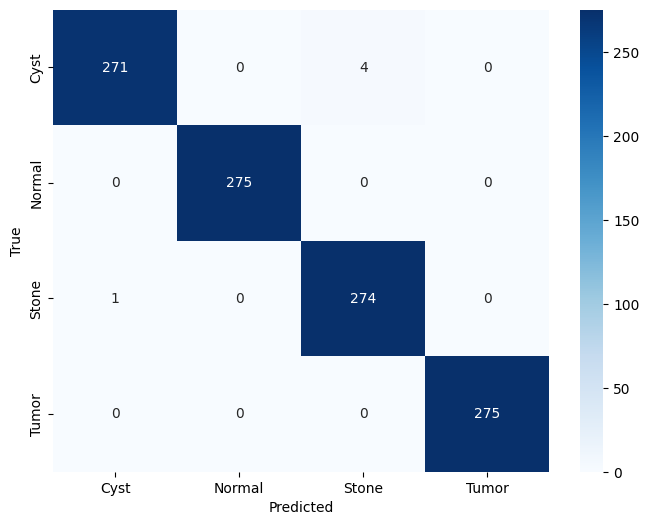

In [ ]:
erfrom sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

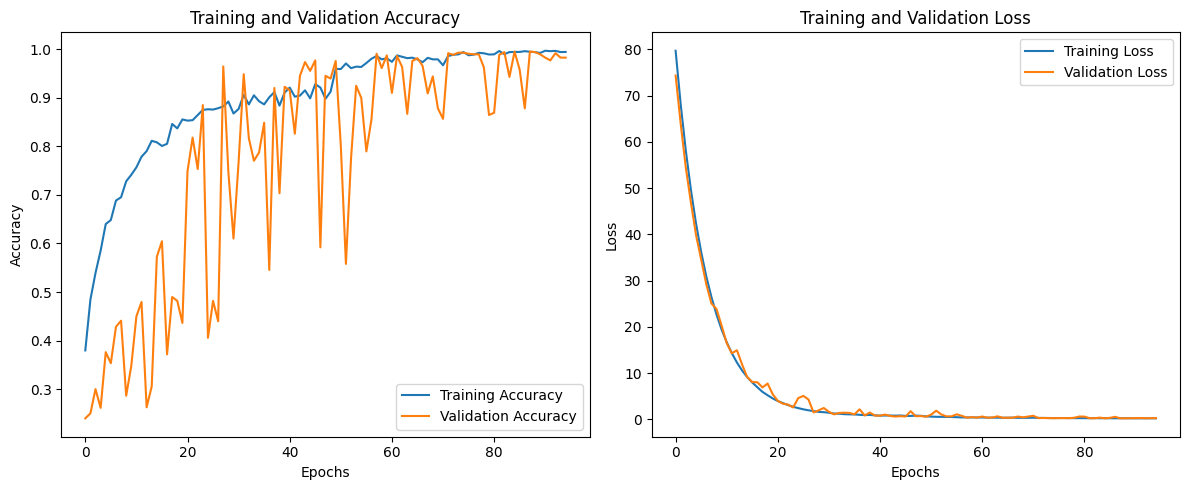

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = 'artifacts/data_ingestion/unzipped_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (10).jpg'  # Replace with the path to your image

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class index to the class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted class: Normal


In [ ]:
tf.version.VERSION

'2.17.0'